In [1]:
import pandas as pd
import numpy as np
import spacy
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('SHL_assesment_list.xlsx')

In [3]:
data

,Assesment Name,URL,Remote Testing Support,Adaptive/IRT,Duration,Job Type,Test Type,Description
0,Account Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,49,Middle,CPAB,The Account Manager solution is an assessment ...
1,Administrative Professional-Short Form,https://www.shl.com/solutions/products/product...,yes,yes,36,Entry -level,AKP,The Administrative Professional solution is fo...
2,Agency Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,51,Manager,ABPS,The Agency Manager solution is for mid-level s...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,30,Entry -level,BP,The Apprentice + 8.0 Job-Focused Assessment is...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,20,Entry -level,BP,The Apprentice 8.0 Job-Focused Assessment is a...
...,...,...,...,...,...,...,...,...
139,Workplace Safety - Individual 7.1 (Americas),https://www.shl.com/solutions/products/product...,yes,no,16,Entry-Level,B,Our Workplace Safety - Individual 7.1 solution...
140,Workplace Safety - Team 7.0 Solution,https://www.shl.com/solutions/products/product...,yes,no,20,Director,B,The Workplace Safety – Team 7.0 solution is de...
141,Workplace Safety - Team 7.1 (Americas),https://www.shl.com/solutions/products/product...,yes,no,20,"Entry-Level, General Population, Professional ...",BCP,The Workplace Safety – Team 7.1 solution is de...
142,Workplace Safety - Team 7.1 (International),https://www.shl.com/solutions/products/product...,yes,no,20,"Entry-Level, General Population, Professional ...",BCP,The Workplace Safety – Team 7.1 solution is de...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Assesment Name          144 non-null    object
 1   URL                     144 non-null    object
 2   Remote Testing Support  144 non-null    object
 3   Adaptive/IRT            144 non-null    object
 4   Duration                144 non-null    int64 
 5   Job Type                144 non-null    object
 6   Test Type               144 non-null    object
 7   Description             144 non-null    object
dtypes: int64(1), object(7)
memory usage: 9.1+ KB


In [5]:
data.describe()

,Duration
count,144.000000
mean,38.569444
std,14.045706
min,16.000000
25%,27.500000
50%,40.000000
75%,49.000000
max,74.000000


In [6]:
data.nunique()

Assesment Name            141
URL                       141
Remote Testing Support      2
Adaptive/IRT                2
Duration                   46
Job Type                   17
Test Type                  33
Description               133
dtype: int64

In [7]:
data.isnull().sum()

Assesment Name            0
URL                       0
Remote Testing Support    0
Adaptive/IRT              0
Duration                  0
Job Type                  0
Test Type                 0
Description               0
dtype: int64

In [8]:
data.duplicated().sum()

1

In [9]:
data=data.drop_duplicates()

In [10]:
data

,Assesment Name,URL,Remote Testing Support,Adaptive/IRT,Duration,Job Type,Test Type,Description
0,Account Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,49,Middle,CPAB,The Account Manager solution is an assessment ...
1,Administrative Professional-Short Form,https://www.shl.com/solutions/products/product...,yes,yes,36,Entry -level,AKP,The Administrative Professional solution is fo...
2,Agency Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,51,Manager,ABPS,The Agency Manager solution is for mid-level s...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,30,Entry -level,BP,The Apprentice + 8.0 Job-Focused Assessment is...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,20,Entry -level,BP,The Apprentice 8.0 Job-Focused Assessment is a...
...,...,...,...,...,...,...,...,...
139,Workplace Safety - Individual 7.1 (Americas),https://www.shl.com/solutions/products/product...,yes,no,16,Entry-Level,B,Our Workplace Safety - Individual 7.1 solution...
140,Workplace Safety - Team 7.0 Solution,https://www.shl.com/solutions/products/product...,yes,no,20,Director,B,The Workplace Safety – Team 7.0 solution is de...
141,Workplace Safety - Team 7.1 (Americas),https://www.shl.com/solutions/products/product...,yes,no,20,"Entry-Level, General Population, Professional ...",BCP,The Workplace Safety – Team 7.1 solution is de...
142,Workplace Safety - Team 7.1 (International),https://www.shl.com/solutions/products/product...,yes,no,20,"Entry-Level, General Population, Professional ...",BCP,The Workplace Safety – Team 7.1 solution is de...


In [11]:
data['Test Type'].value_counts()

Test Type
ABP      42
ABPS     16
B        13
BCP      12
BC        9
AB        5
CP        4
BP        4
ABKPS     4
ABKP      3
BKP       3
PSKBA     2
S         2
SABP      2
SBCP      2
ABC       2
CB        2
PB        1
CPAB      1
APSB      1
PAB       1
PBC       1
BK        1
SABKP     1
CPB       1
AKP       1
BPA       1
PBCAS     1
ABCPS     1
PSAB      1
BAP       1
BPSA      1
BKPS      1
Name: count, dtype: int64

In [12]:
data['Job Type'].value_counts()

Job Type
Entry -level                                                                    64
Manager                                                                         23
Mid-Professional, Professional Individual Contributor                           14
Executive, Director, Front Line Manager, Manager                                 8
Front Line Manager, Manager, Supervisor                                          7
Entry-Level                                                                      6
Middle                                                                           5
Graduate                                                                         3
Mid-Professional,Professional Individual Contributor                             2
Director                                                                         2
Mid-Professional                                                                 2
Entry-Level, General Population, Professional Individual Contributor          

In [13]:
data['Adaptive/IRT'].value_counts()

Adaptive/IRT
yes    74
no     69
Name: count, dtype: int64

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


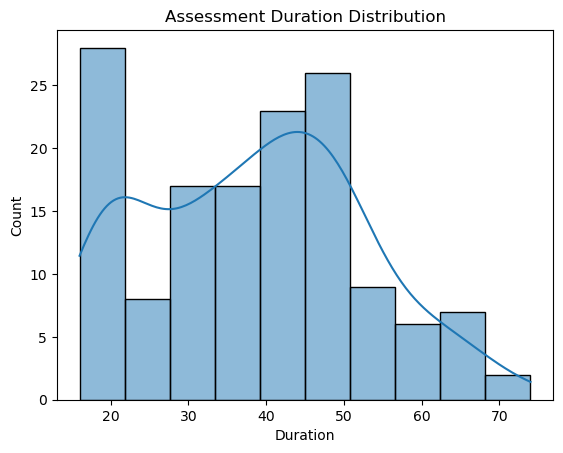

In [14]:
sns.histplot(data['Duration'], bins=10, kde=True)
plt.title("Assessment Duration Distribution")
plt.show()

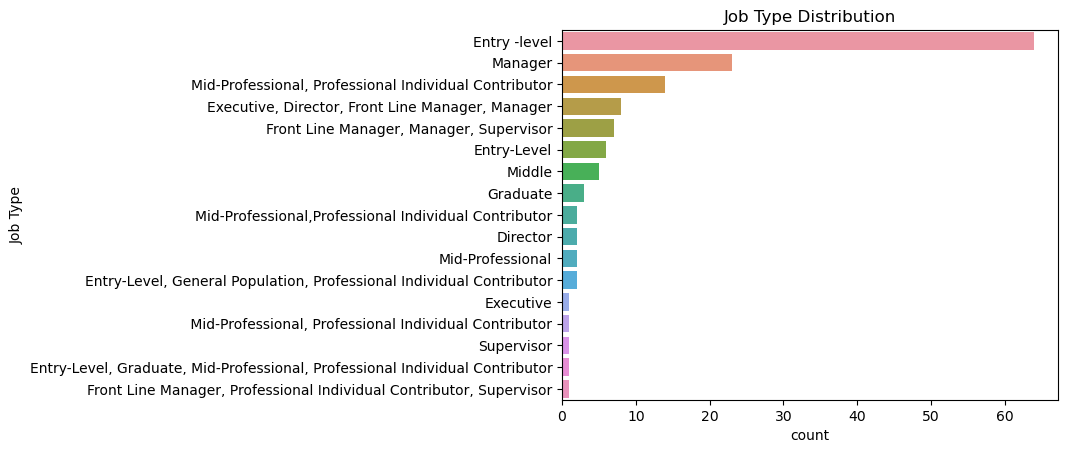

In [15]:
sns.countplot(data=data, y='Job Type', order=data['Job Type'].value_counts().index)
plt.title("Job Type Distribution")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15688\3345877905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['desc_len'] = data['Description'].apply(lambda x: len(x.split()))
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


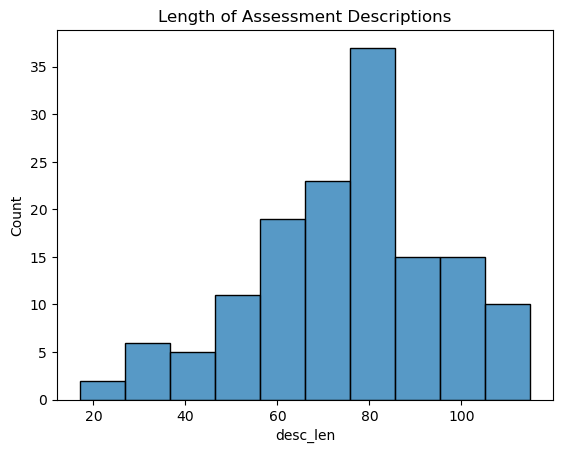

In [16]:
data['desc_len'] = data['Description'].apply(lambda x: len(x.split()))

sns.histplot(data['desc_len'], bins=10)
plt.title("Length of Assessment Descriptions")
plt.show()

## Combining Description and Job Type for Model building and Visualization

In [17]:
data['Comb_text'] = data['Job Type'].fillna('') + ' ' + data['Description']

C:\Users\Dell\AppData\Local\Temp\ipykernel_15688\2945813371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comb_text'] = data['Job Type'].fillna('') + ' ' + data['Description']


# Word Cloud

In [18]:
import spacy
nlp=spacy.load('en_core_web_sm')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import SnowballStemmer

In [19]:
lem=WordNetLemmatizer()
def clean_words(text):
    # Define a regex pattern for URLs
    url_pattern = re.compile(r'http[s]?://\S+')
    
    # Remove URLs from the text
    text = re.sub(url_pattern, '', text)
    doc= nlp(text)
    clean_text=[x.lemma_ for x in doc if not x.is_stop and not x.is_punct and not x.like_num and not x.is_bracket and not x.pos_ in['SYM']]
    return ' '.join(clean_text)

In [20]:
# Apply the cleaning function to the 'Comb_text' column
data['cleaned_text'] = data['Comb_text'].apply(clean_words)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15688\3153535193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['Comb_text'].apply(clean_words)


In [21]:
data.head()

,Assesment Name,URL,Remote Testing Support,Adaptive/IRT,Duration,Job Type,Test Type,Description,desc_len,Comb_text,cleaned_text
0,Account Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,49,Middle,CPAB,The Account Manager solution is an assessment ...,87,Middle The Account Manager solution is an asse...,Middle Account Manager solution assessment job...
1,Administrative Professional-Short Form,https://www.shl.com/solutions/products/product...,yes,yes,36,Entry -level,AKP,The Administrative Professional solution is fo...,67,Entry -level The Administrative Professional s...,entry -level Administrative Professional solut...
2,Agency Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,51,Manager,ABPS,The Agency Manager solution is for mid-level s...,77,Manager The Agency Manager solution is for mid...,Manager Agency Manager solution mid level sale...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,30,Entry -level,BP,The Apprentice + 8.0 Job-Focused Assessment is...,51,Entry -level The Apprentice + 8.0 Job-Focused ...,entry -level Apprentice + Job Focused Assessme...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,20,Entry -level,BP,The Apprentice 8.0 Job-Focused Assessment is a...,43,Entry -level The Apprentice 8.0 Job-Focused As...,entry -level Apprentice Job Focused Assessment...


In [22]:
df= [x.strip() for x in data.cleaned_text] # remove the space in paragraph
txt=''.join(df)

In [23]:
txt

'Middle Account Manager solution assessment job candidate apply mid level leadership position tend manage day day operation activity client account sample task job include limit communicate client project status develop maintain project plan coordinate internally appropriate project personnel ensure client expectation meet potential job title use solution Account Executive Account Manager Senior Account Manager multiple configuration solution availableentry -level Administrative Professional solution entry mid level position involve routine clerical administrative function addition office management function customer service sample task job include limit arrange conference call draft correspondence scheduling meeting greet visitor coordinate office activity potential job title use solution Administrative Assistant Secretary Office Manager Administrative Aide Administrative AssociateManager Agency Manager solution mid level sale management position include line management sale responsib

In [24]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [25]:
def wordcloud(data):
  plt.figure(figsize=(10,10))
  plt.imshow(data,interpolation='bilinear')
  plt.axis('off')
  plt.show() 

In [26]:
df_cloud= WordCloud(width=800,height=1000,background_color='black',colormap='plasma').generate(txt)

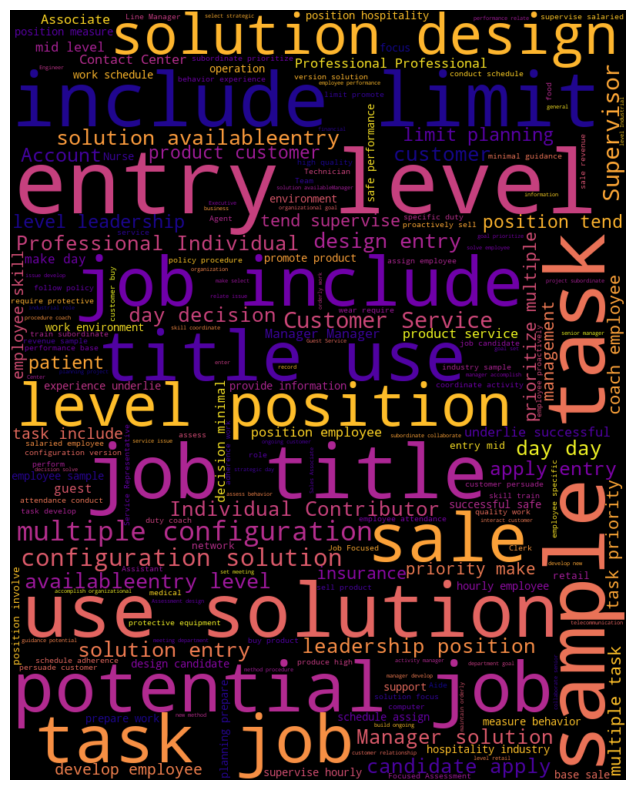

In [27]:
wordcloud(df_cloud)

## Sentiment Analysis

In [28]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [29]:
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15688\3753534125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['cleaned_text'].apply(get_sentiment)


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


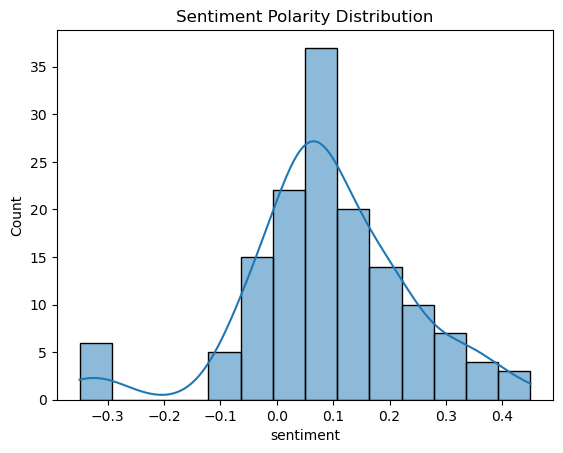

In [30]:
sns.histplot(data['sentiment'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()

## N-grams Analysis

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(data, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(data)
    ngrams_freq = ngrams.sum(axis=0).A1
    ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['frequency'])
    ngrams_df = ngrams_df.sort_values(by='frequency', ascending=False).head(20)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=ngrams_df.frequency, y=ngrams_df.index, palette='viridis')
    plt.title(f'Top {n}-grams')
    plt.show()

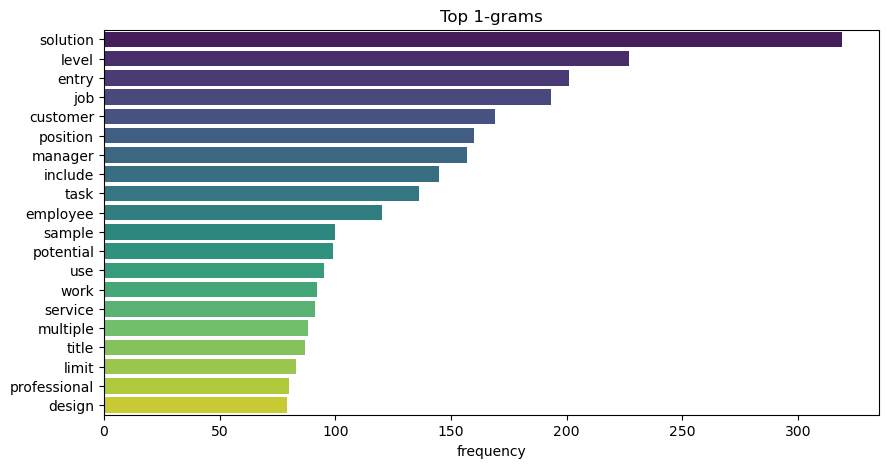

In [32]:
## Unigrams
plot_ngrams(data['cleaned_text'], n=1)

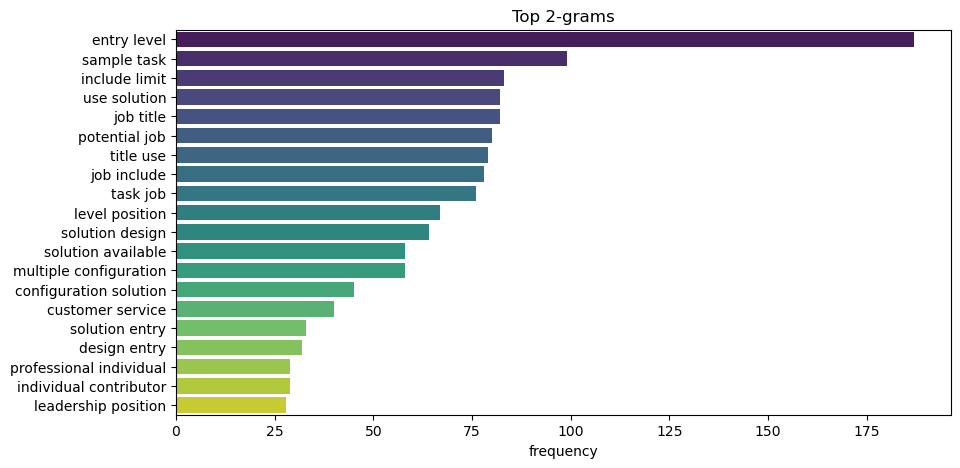

In [33]:
# Bigrams
plot_ngrams(data['cleaned_text'], n=2)

# Model Building

## Install Required Packages

In [172]:
!pip install sentence-transformers faiss-cpu umap-learn matplotlib

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/45/2d/1151b371f28caae565ad384fdc38198f1165571870217aedda230b9d7497/sentence_transformers-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for faiss-cpu from https://files.pythonhosted.org/packages/2c/2d/d2a4171a9cca9a7c04cd9d6f9441a37f1e0558724b90bf7fc7db08553601/faiss_cpu-1.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.41.0 from https://files.pythonhosted.org/packages/a9/b6/5257d04ae327b44db31f15cce39e6020cc986333c715660b1315a9724d82/transformers-4.51.3-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/11/c5/2370d96b31eb1841c3a0883a49

In [175]:
!pip install --upgrade typing_extensions

In [176]:
!pip install --upgrade transformers

In [212]:
!pip install typing_extensions==4.7.1 --force-reinstall

  Obtaining dependency information for typing_extensions==4.7.1 from https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl.metadata
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.30.0 requires typing_extensions~=4.9, but you have typing-extensions 4.7.1 which is incompatible.
torch 2.6.0 requires typing-extensions>=4.10.0, but you have typing-extensions 4.7.1 which is incompatible.


In [213]:
!pip install --upgrade sentence-transformers

  Obtaining dependency information for typing_extensions>=4.5.0 from https://files.pythonhosted.org/packages/8b/54/b1ae86c0973cc6f0210b53d508ca3641fb6d0c56823f288d108bc7ab3cc8/typing_extensions-4.13.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


In [34]:
from sentence_transformers import SentenceTransformer
texts = data['cleaned_text'].tolist()

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings
embeddings = model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
import faiss

# Convert to float32 for FAISS
embeddings_np = np.array(embeddings).astype('float32')

# Create FAISS index
index = faiss.IndexFlatL2(embeddings_np.shape[1])  # L2 distance
index.add(embeddings_np)

In [38]:
new_df = data[['Assesment Name', 'cleaned_text','Duration','Remote Testing Support','URL','Adaptive/IRT','Job Type']].copy()
def recommend_assessments(profile_text, model, index, new_df, top_n=10):
    profile_embedding = model.encode([profile_text]).astype('float32')
    _, indices = index.search(profile_embedding, top_n)
    return new_df.iloc[indices[0]]

In [39]:
profile = "The Installation and Repair Technician solution is designed for use with entry-level field technician positions in the telecommunications industry. The solution is focused on positions that involve installing, repairing, and maintaining telecommunications equipment, along with some customer interaction, and little to no specific sales components. Sample tasks may include: installing or repairing end-user telecommunications equipment and services, interacting with customers, and installing, or repairing telecommunications network infrastructure. Potential job titles that use this solution are: Installer, Service Technician, and Customer Installation Technician. There are multiple configurations of this solution available"
recommendations = recommend_assessments(profile, model, index, new_df, top_n=10)
recommendations[['Assesment Name', 'cleaned_text','Duration','Remote Testing Support','URL','Adaptive/IRT','Job Type']]

,Assesment Name,cleaned_text,Duration,Remote Testing Support,URL,Adaptive/IRT,Job Type
64,Installation and Repair Technician Solution,Mid Professional Professional Individual Contr...,49,yes,https://www.shl.com/solutions/products/product...,yes,"Mid-Professional,Professional Individual Contr..."
132,Technician/Technologist Solution,Mid Professional Technician technologist solut...,52,yes,https://www.shl.com/solutions/products/product...,yes,Mid-Professional
107,Sales Engineer Solution,Mid Professional Professional Individual Contr...,61,yes,https://www.shl.com/solutions/products/product...,yes,"Mid-Professional, Professional Individual Cont..."
84,Network Engineer/Analyst Solution,Mid Professional Professional Individual Contr...,41,yes,https://www.shl.com/solutions/products/product...,yes,"Mid-Professional, Professional Individual Cont..."
60,Industrial - Semi-skilled 7.1 (Americas),entry -level Industrial semi skilled solution ...,24,yes,https://www.shl.com/solutions/products/product...,no,Entry -level
61,Industrial - Semi-skilled 7.1 (International),entry -level Industrial semi skilled solution ...,24,yes,https://www.shl.com/solutions/products/product...,no,Entry -level
83,Manufacturing Skilled Maintenance Worker,entry -level Manufacturing Skilled Maintenance...,45,yes,https://www.shl.com/solutions/products/product...,no,Entry -level
114,Sales Support Specialist Solution,entry -level Sales support Specialist solution...,43,yes,https://www.shl.com/solutions/products/product...,yes,Entry -level
50,Healthcare Call Center Agent Solution,entry -level Healthcare Center Agent solution ...,44,yes,https://www.shl.com/solutions/products/product...,yes,Entry -level
56,Industrial - Entry Level 7.0 Solution,entry -level Industrial Entry level solution d...,20,yes,https://www.shl.com/solutions/products/product...,no,Entry -level


# Deployment

In [40]:
# Save SBERT model
model.save('sbert_model/')

# Save FAISS index
faiss.write_index(index, 'faiss_index.index')

# Save the dataframe used for recommendations
new_df.to_csv('assessment_data.csv', index=False)